# WeatherPy

Observations:
- Based on the plots with cloudiness vs latitude and wind speed vs latitude we can conclude that there is no relationship between them. 
- This activity follows the logic that the closer you get to the equator the warmer the temperature becomes. This is seen on the linear regression plots with the temperature vs latitude relationship.
----

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#importing python code, new functionalities in python to call
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of lats and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_api_key = weather_api_key
settings = {"units":"imperial", "appid": weather_api_key}

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
        

In [7]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2c52de1315867672ece8a4b05b0348a2&units=imperial'

In [8]:
#City Data
city_data = []

#print
print("Data Gathering:")
print("--------------")


Data Gathering:
--------------


In [9]:
#create counters
count_record = 0
set_count = len(cities)


#loop through cities
for i, city in enumerate(cities):
    count_record += 1
    
    #logging in sets of 100
    if (count_record % 100 == 0 and count_record >= 100):
        print("Processing Record %s of %s | %s" % (count_record, set_count, city))
    
    
    #Endpoint url with each city
    city_url = query_url + "&q=" + city
      
    
    #run api for each city
    try: 
        city_weather = requests.get(city_url).json()
        
        #max temp, humidity, cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append into list
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_long,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except Exception as e:
        
        print("Error Processing Record %s of %s | %s" % (count_record, set_count, city))
        print(str(e))
   
    


Error Processing Record 3 of 630 | warqla
'coord'
Error Processing Record 12 of 630 | ngukurr
'coord'
Error Processing Record 13 of 630 | mahaicony
'coord'
Error Processing Record 14 of 630 | barentsburg
'coord'
Error Processing Record 25 of 630 | sayanskiy
'coord'
Error Processing Record 41 of 630 | attawapiskat
'coord'
Error Processing Record 44 of 630 | bargal
'coord'
Error Processing Record 54 of 630 | saleaula
'coord'
Error Processing Record 61 of 630 | taolanaro
'coord'
Error Processing Record 73 of 630 | tumannyy
'coord'
Error Processing Record 86 of 630 | illoqqortoormiut
'coord'
Processing Record 100 of 630 | biltine
Error Processing Record 101 of 630 | ondorhaan
'coord'
Error Processing Record 104 of 630 | tsihombe
'coord'
Error Processing Record 111 of 630 | mys shmidta
'coord'
Error Processing Record 114 of 630 | belushya guba
'coord'
Error Processing Record 116 of 630 | sorvag
'coord'
Error Processing Record 127 of 630 | gurgan
'coord'
Error Processing Record 139 of 630 | 

In [10]:
city_weather

{'coord': {'lon': -86.16, 'lat': 39.77},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 75.54,
  'feels_like': 68.49,
  'temp_min': 73.99,
  'temp_max': 77,
  'pressure': 1015,
  'humidity': 41},
 'visibility': 16093,
 'wind': {'speed': 12.75, 'deg': 280},
 'clouds': {'all': 40},
 'dt': 1590793511,
 'sys': {'type': 1,
  'id': 4533,
  'country': 'US',
  'sunrise': 1590747593,
  'sunset': 1590800683},
 'timezone': -14400,
 'id': 4260977,
 'name': 'Marion',
 'cod': 200}

In [15]:
#print sign complete
print("Data Retrieval Complete")
print("-----------------------")

Data Retrieval Complete
-----------------------


In [19]:
#creating dataframe for selected columns
city_df = pd.DataFrame(city_data)

city_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#creating dataframe for selected columns
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klaksvik,62.23,-6.59,59.00,72,99,17.22,FO,1590793435
1,mataura,-46.19,168.86,48.36,75,2,2.21,NZ,1590793435
2,lorengau,-2.02,147.27,82.47,76,92,1.12,PG,1590793436
3,te anau,-45.42,167.72,45.90,76,27,1.12,NZ,1590793436
4,sisimiut,66.94,-53.67,34.95,85,10,11.59,GL,1590793436
...,...,...,...,...,...,...,...,...,...
576,vila,42.03,-8.16,69.01,82,85,1.12,PT,1590793558
577,baruun-urt,46.68,113.28,49.50,72,87,9.57,MN,1590793558
578,chalons-en-champagne,48.95,4.37,57.20,58,0,8.05,FR,1590793558
579,grand-lahou,5.14,-5.02,79.48,88,50,6.62,CI,1590793559


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#get summary stats use .describe()
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.00000,581.000000,581.000000,5.810000e+02
mean,19.696472,20.701756,65.668589,70.51463,50.555938,7.900568,1.590793e+09
std,32.879656,90.515910,15.337918,20.97014,37.416008,5.554679,7.506344e+01
min,-54.800000,-175.200000,26.150000,1.00000,0.000000,0.040000,1.590793e+09
25%,-6.980000,-58.740000,53.600000,60.00000,10.000000,3.800000,1.590793e+09
50%,22.080000,26.560000,67.440000,76.00000,53.000000,6.930000,1.590793e+09
75%,47.500000,102.240000,77.920000,87.00000,90.000000,10.670000,1.590794e+09
max,78.220000,179.320000,104.000000,100.00000,100.000000,34.450000,1.590794e+09


In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
dirty_city_df = city_df[(city_df["Humidity"] > 100)].index
dirty_city_df

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(dirty_city_df, inplace=False)
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klaksvik,62.23,-6.59,59.00,72,99,17.22,FO,1590793435
1,mataura,-46.19,168.86,48.36,75,2,2.21,NZ,1590793435
2,lorengau,-2.02,147.27,82.47,76,92,1.12,PG,1590793436
3,te anau,-45.42,167.72,45.90,76,27,1.12,NZ,1590793436
4,sisimiut,66.94,-53.67,34.95,85,10,11.59,GL,1590793436


In [23]:
# Extract relevant fields from the data frame
# convert to csv
clean_city_df.to_csv('clean_city_df_output.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

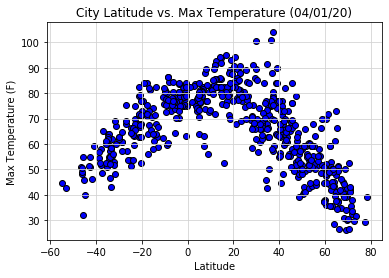

In [24]:
#graph plot of lat vs. temp
plt.scatter(clean_city_df["Lat"],clean_city_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save image
plt.savefig("LatvsMaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

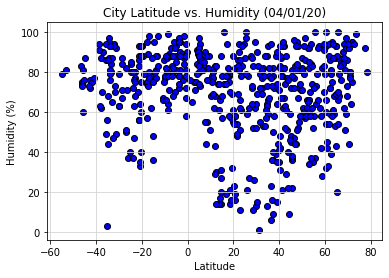

In [25]:
#graph plot of lat vs. Humidity
plt.scatter(clean_city_df["Lat"],clean_city_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save image, needs to be in this order or the png will be blank
plt.savefig("LatvsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

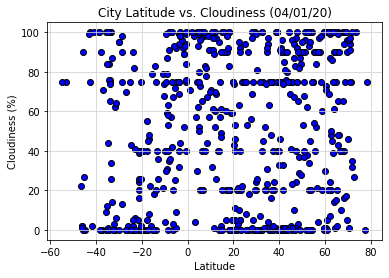

In [26]:
#graph plot of lat vs. Cloudiness
plt.scatter(clean_city_df["Lat"],clean_city_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save image
plt.savefig("LatvsMaxCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

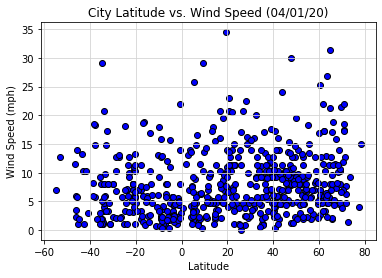

In [27]:
#graph plot of lat vs. Wind Speed Plot
plt.scatter(clean_city_df["Lat"],clean_city_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save image
plt.savefig("LatvsWindSpeed.png")
plt.show()

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots
# need to define variables for formula y = mx + b

def plot_linear_regress(x_values, y_values, title, text_coordinates):


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    #formatting
    plt.text(15, 45, line_eq, fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    
    plt.savefig("linregress.png")
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = clean_city_df.loc[(clean_city_df["Lat"] >= 0)]
north_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klaksvik,62.23,-6.59,59.00,72,99,17.22,FO,1590793435
4,sisimiut,66.94,-53.67,34.95,85,10,11.59,GL,1590793436
6,marystown,47.17,-55.15,52.81,95,97,15.28,CA,1590793437
8,krasnoufimsk,56.61,57.77,51.22,79,21,1.95,RU,1590793437
9,kapaa,22.08,-159.32,84.99,69,20,13.87,US,1590793437
...,...,...,...,...,...,...,...,...,...
576,vila,42.03,-8.16,69.01,82,85,1.12,PT,1590793558
577,baruun-urt,46.68,113.28,49.50,72,87,9.57,MN,1590793558
578,chalons-en-champagne,48.95,4.37,57.20,58,0,8.05,FR,1590793558
579,grand-lahou,5.14,-5.02,79.48,88,50,6.62,CI,1590793559


In [30]:
# Create Southern Hemisphere Dataframe
south_hem_df = clean_city_df.loc[(clean_city_df["Lat"] < 0)]
south_hem_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mataura,-46.19,168.86,48.36,75,2,2.21,NZ,1590793435
2,lorengau,-2.02,147.27,82.47,76,92,1.12,PG,1590793436
3,te anau,-45.42,167.72,45.90,76,27,1.12,NZ,1590793436
5,port alfred,-33.59,26.89,57.99,80,34,5.99,ZA,1590793436
7,rikitea,-23.12,-134.97,75.13,80,6,9.95,PF,1590793437
...,...,...,...,...,...,...,...,...,...
558,lae,-6.72,146.98,75.20,78,75,5.82,PG,1590793554
559,port augusta,-32.50,137.77,55.99,47,0,17.22,AU,1590793555
564,ngunguru,-35.62,174.50,61.00,94,9,1.01,NZ,1590793556
566,kruisfontein,-34.00,24.73,52.25,93,74,5.70,ZA,1590793556


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6563389901611515


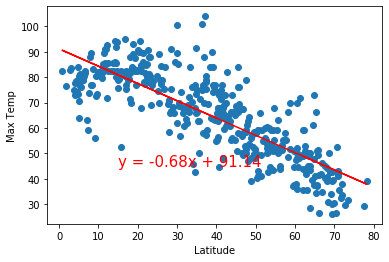

<Figure size 432x288 with 0 Axes>

In [34]:
#Northern Hem plot linear regression for max temp vs lat
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]
plot_linear_regress(x_values, y_values, 'Max Temp',(6,30))

plt.savefig("NorthernMaxTempvsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.658441252660112


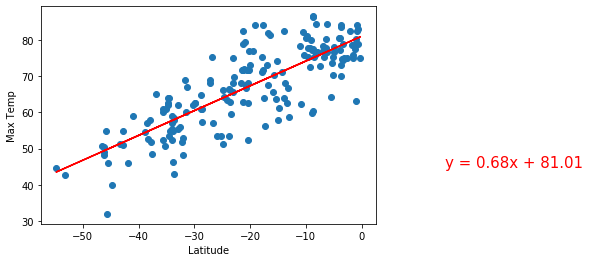

<Figure size 432x288 with 0 Axes>

In [37]:
#Southern Hem plot linear regression for max temp vs lat
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]
plot_linear_regress(x_values, y_values, 'Max Temp',(-50,90))

plt.savefig("SouthernMaxTempvsLatLinReg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006688332478683869


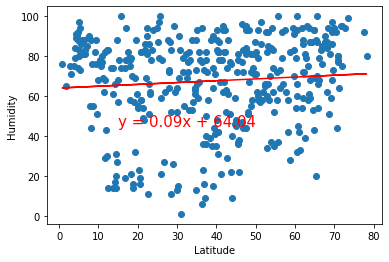

<Figure size 432x288 with 0 Axes>

In [40]:
#Northern Hem plot linear regression for humidity vs lat
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]
plot_linear_regress(x_values, y_values, 'Humidity',(40,10))

plt.savefig("NorthernHumidityvsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03480455114021379


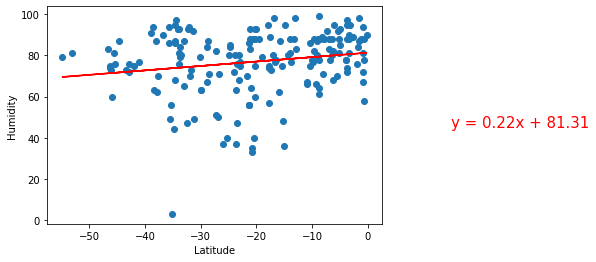

<Figure size 432x288 with 0 Axes>

In [41]:
#Southern Hem plot linear regression for humidity vs lat
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]
plot_linear_regress(x_values, y_values, 'Humidity',(-50,30))

plt.savefig("SouthernHumidtyvsLatLinReg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00018792887847026771


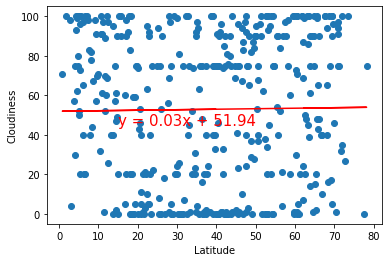

<Figure size 432x288 with 0 Axes>

In [42]:
#Northern Hem plot linear regression for Cloudiness vs lat
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]
plot_linear_regress(x_values, y_values, 'Cloudiness',(40,10))

plt.savefig("NorthernCloudinessvsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0330567901021707


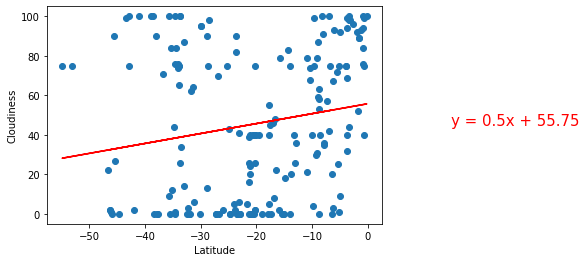

<Figure size 432x288 with 0 Axes>

In [43]:
#Southern Hem plot linear regression for Cloudiness vs lat
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]
plot_linear_regress(x_values, y_values, 'Cloudiness',(-30,30))

plt.savefig("SouthernCloudinessvsLatLinReg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009859146720562576


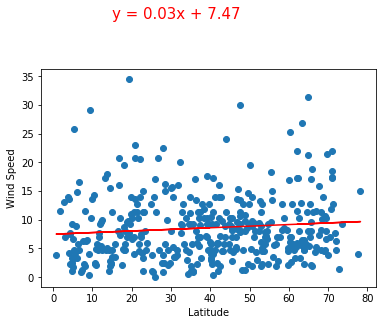

<Figure size 432x288 with 0 Axes>

In [46]:
#Northern Hem plot linear regression for Wind Speed vs lat
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]
plot_linear_regress(x_values, y_values, 'Wind Speed',(40,25))

plt.savefig("NorthernWindSpeedvsLatLinReg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025426173888927928


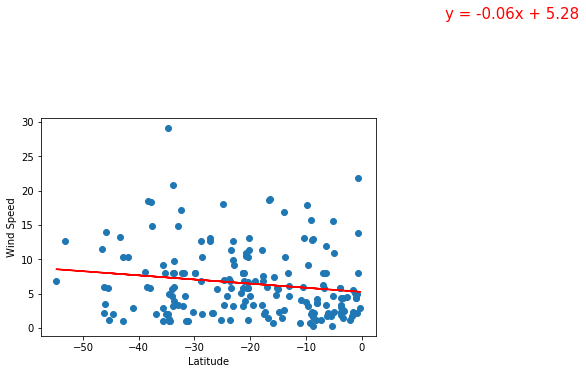

<Figure size 432x288 with 0 Axes>

In [48]:
#Southern Hem plot linear regression for wind speed vs lat
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]
plot_linear_regress(x_values, y_values, 'Wind Speed',(-50,30))

plt.savefig("SouthernWindSpeedvsLatLinReg.png")
plt.show()